<p>Logistic Regression with <b>L2 Regularization</b></p>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
def layer_size(X, Y):
    in_layer, out_layer = (X.shape[0], Y.shape[0])
    
    return in_layer, out_layer

In [64]:
def param_init(in_layer, out_layer, beta):
    
    W = np.random.randn(out_layer, in_layer) * beta
    b = np.zeros((out_layer, 1))
    
    params = {
        "W": W,
        "b": b
    }
    return params

In [65]:
def compute_cost(A, Y, W, lam):
    
    m = Y.shape[1]
    
    log_likelihood = np.sum(
        - np.multiply(np.log(A), Y
                     ) - np.multiply(np.log(1 - A), 1 - Y)) / m
    
    reg = (np.sum(np.square(W)) * lam) / (2 * m)
    
    cost = log_likelihood + reg

    return cost

In [66]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

In [67]:
def forward_propagation(X, W, b):
    Z = np.matmul(W, X) + b
    return Z

In [68]:
def back_propagation(X, Y, A, W, b, lam):
    
    m = X.shape[1]
    dA = A - Y
    dW = (np.matmul(dA, X.T) + (lam * W)) / m
    db = np.sum(dA, axis=1, keepdims=True) / m
    
    grads = {
        "dW": dW,
        "db": db
    }
    return grads   

In [69]:
def update_params(W, b, dW, db, alpha):
    
    W -= alpha * dW
    b -= alpha * db
    
    params = {
        "W": W,
        "b": b
    }
    
    return params

In [70]:
def train(X, Y, alpha=1e-2, beta=1e-2, lam=1, num_iter=200, n=20):
    """Y.shape = (m, n), X.shape = (m, #features)"""
    
    cost_ = []
    params_ = []
    
    X = np.transpose(X)
    Y = np.transpose(Y)
    
    in_layer, out_layer = layer_size(X, Y)
    params = param_init(in_layer, out_layer, beta)
    
    for i in range(num_iter):
        
        Z = forward_propagation(X, params["W"], params["b"])
        A = sigmoid(Z)
        cost = compute_cost(A, Y, params["W"], lam)
        grads = back_propagation(X, Y, A, params["W"], params["b"], lam)
        params = update_params(params["W"], params["b"], grads["dW"], grads["db"], alpha)
        cost_.append(cost)
        params_.append(params)
        
        if i % n == 0:
            print(f"Iter {i}: {cost}")
            
    return params, cost_

In [105]:
def predicted(X, params, threshold=0.5):
    
    Z = forward_propagation(X, params["W"], params["b"])
    A = sigmoid(Z)
    predict = np.where(A >= threshold, 1, 0)
    
    return A, predict

<p>Generate synthetic data</p>

In [72]:
np.random.seed(2)
x1 = np.random.uniform(-2, 2, 300)
x2 = np.random.uniform(-2, 2, 300)
y1 = np.zeros((300, 1))
d1 = np.c_[x1, x2, y1]



x3 = np.random.uniform(-4, 3, 1000)
x4 = np.random.uniform(-3, 4, 1000)


r = []
for i in d:
    if i[0] > 1.95 or i[0] < -1.95 and i[1] > 1.95 or i[1] < -1.95:
        r.append(i)
        
r = np.array(r)
y2 = np.ones((len(r), 1))

d2 = np.c_[r[:, 0], r[:, 1], y2]

data = np.vstack((d1, d2))
print(data.shape)
print(data[:10, :])
print(data[660:, :])

(672, 3)
[[-0.25602039 -1.88340273  0.        ]
 [-1.89629507 -0.50842846  0.        ]
 [ 0.19864991 -1.61650674  0.        ]
 [-0.25871043 -1.21214272  0.        ]
 [-0.31852879  1.76968245  0.        ]
 [-0.67866072 -0.51491531  0.        ]
 [-1.18140546  0.91600321  0.        ]
 [ 0.47708387 -1.49535957  0.        ]
 [-0.80138131 -0.99486831  0.        ]
 [-0.9326909   1.52494119  0.        ]]
[[-2.92814828 -2.61860018  1.        ]
 [ 2.74542458 -1.31599264  1.        ]
 [ 2.72165382  2.69257603  1.        ]
 [-2.1251868   3.95340542  1.        ]
 [-0.02951742 -1.98221349  1.        ]
 [-3.45090581  2.45684276  1.        ]
 [ 2.84688297 -1.3401629   1.        ]
 [ 1.6873011  -2.79083608  1.        ]
 [ 2.87279511 -0.3862868   1.        ]
 [-1.69767246 -2.90198885  1.        ]
 [-2.51017955  3.4959819   1.        ]
 [-2.970034   -2.19865669  1.        ]]


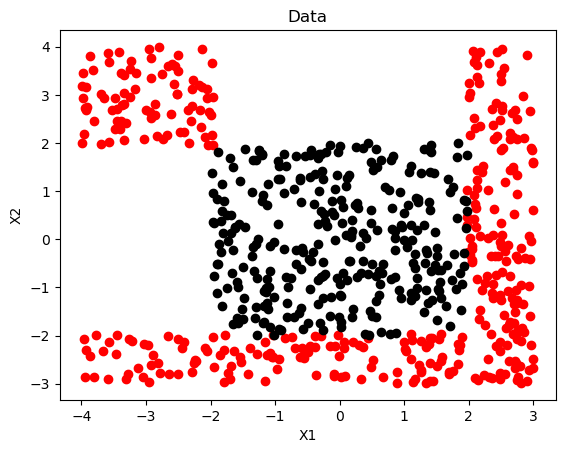

In [73]:
plt.scatter(d2[:, 0], d2[:, 1], color="red")
plt.scatter(d1[:, 0], d1[:, 1], color="black")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data")
plt.show()

In [86]:
Y = data[:, -1]
X = data[:,:-1]
Y = Y.reshape((672, 1))
print(Y.shape)
print(X.shape)
data = np.c_[X[:,0], X[:, 1], X[:,0]**2, X[:, 1]**2, X[:, 0]*X[:, 1], Y]
np.random.shuffle(data)

train_data = data[:600, :]
test_data = data[600:, :]
print(len(train_data))
print(len(test_data))
X_train = train_data[:, :-1]
Y_train = train_data[:, -1]
X_test = test_data[:, :-1]
Y_test = test_data[:, -1] 
Y_train = Y_train.reshape((600, 1))
Y_test = Y_test.reshape((72, 1))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(672, 1)
(672, 5)
600
72
(600, 5)
(600, 1)
(72, 5)
(72, 1)


In [110]:
params, cost = train(X_train, Y_train, alpha=0.3, beta=1e-2, lam=10, num_iter=1000000, n=50000)
print(params)

Iter 0: 0.7022429333099104
Iter 50000: 0.14311067597176447
Iter 100000: 0.14311067597176447
Iter 150000: 0.14311067597176447
Iter 200000: 0.14311067597176447
Iter 250000: 0.14311067597176447
Iter 300000: 0.14311067597176447
Iter 350000: 0.14311067597176447
Iter 400000: 0.14311067597176447
Iter 450000: 0.14311067597176447
Iter 500000: 0.14311067597176447
Iter 550000: 0.14311067597176447
Iter 600000: 0.14311067597176447
Iter 650000: 0.14311067597176447
Iter 700000: 0.14311067597176447
Iter 750000: 0.14311067597176447
Iter 800000: 0.14311067597176447
Iter 850000: 0.14311067597176447
Iter 900000: 0.14311067597176447
Iter 950000: 0.14311067597176447
{'W': array([[ 0.49855281, -0.5811184 ,  1.16405703,  1.09823478,  0.00808293]]), 'b': array([[-6.45872378]])}


In [111]:
A, result = predicted(X_test.reshape((5, 72)), params, threshold=0.5)
print(result)

[[0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0
  0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1]]
